Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### Import Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Set-up

In [2]:
# Seaborn plot style
sns.set_style('white')

# Color palette for plotting
colors = ["#e74c3c", "#34495e", "#2ecc71"]

### Read data

The following datasets are generated for demonstrative purposes. The goal is to show how characteristics of different clustering algorithms on datasets with different 2D shapes.

In [3]:
# 1. Concentric circles
noisy_circles = pd.read_csv('https://www.dropbox.com/s/cgabfjzilc5hzcz/noisy_circles.csv?dl=1')

# 2. Interleaving half circles
noisy_moons = pd.read_csv('https://www.dropbox.com/s/t9dhhn3yuayfa7i/noisy_moons.csv?dl=1')

# 3. Blobs with varied variances
varied = pd.read_csv('https://www.dropbox.com/s/esgfpgjebb5fj9d/varied.csv?dl=1')

# 4. Anisotropicly distributed data
aniso = pd.read_csv('https://www.dropbox.com/s/2ei3rerl5kl2zt0/aniso.csv?dl=1')

# 5. Gaussian blobs
blobs = pd.read_csv('https://www.dropbox.com/s/dvxhka6v2n1jagv/blobs.csv?dl=1')

# 6. No structure
no_structure = pd.read_csv('https://www.dropbox.com/s/rbjmbwr6zovs12z/no_structure.csv?dl=1')

### View datasets

In [8]:
noisy_moons.y

0       1
1       0
2       0
3       0
4       1
5       0
6       0
7       1
8       0
9       0
10      0
11      1
12      1
13      1
14      1
15      0
16      0
17      1
18      1
19      1
20      1
21      1
22      0
23      1
24      0
25      1
26      0
27      1
28      1
29      0
       ..
1470    1
1471    1
1472    0
1473    0
1474    0
1475    1
1476    0
1477    0
1478    1
1479    0
1480    0
1481    0
1482    1
1483    0
1484    0
1485    1
1486    0
1487    0
1488    1
1489    1
1490    0
1491    0
1492    1
1493    0
1494    0
1495    1
1496    0
1497    1
1498    1
1499    1
Name: y, Length: 1500, dtype: int64

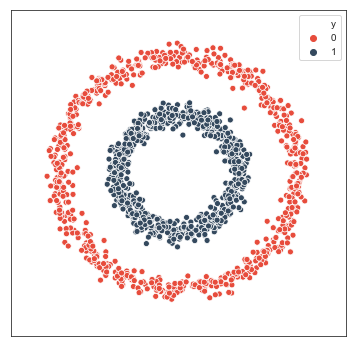

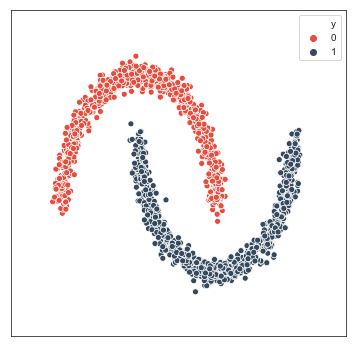

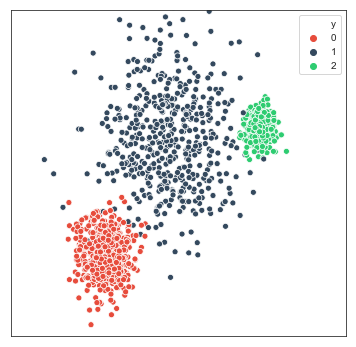

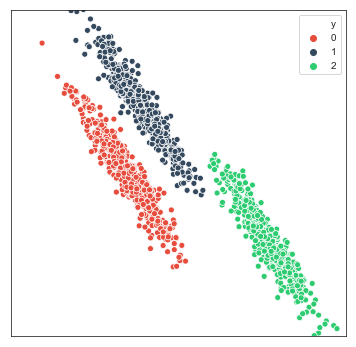

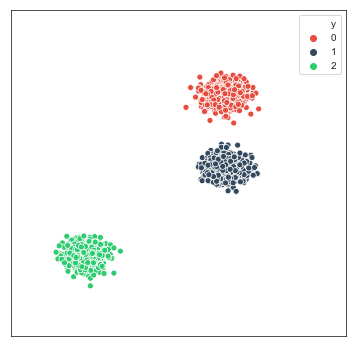

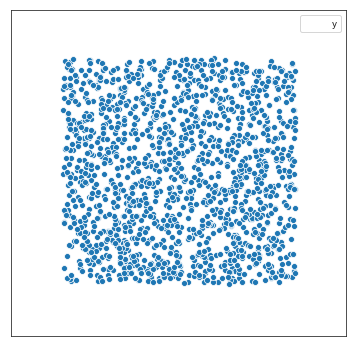

In [4]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

for dataset in datasets:

    # Standardize the dataset
    X = StandardScaler().fit_transform(dataset[['X1', 'X2']])
    
    # Count the number of clusters in the dataset
    n_clus = dataset['y'].nunique()

    # Scatter plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dataset['y'], palette=colors[:n_clus])
    
    # Adjust/clean the plot
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())

### Agglomerative Clustering using Ward Linkage Method

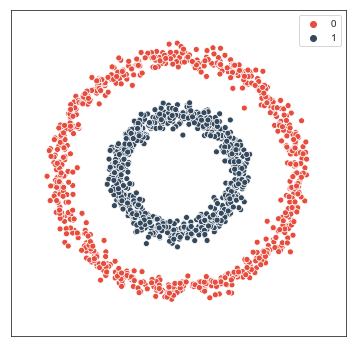

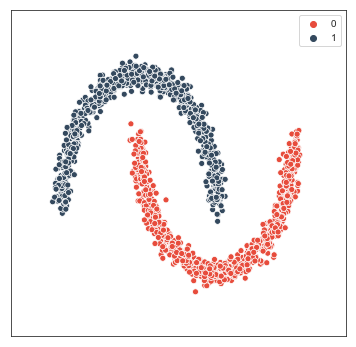

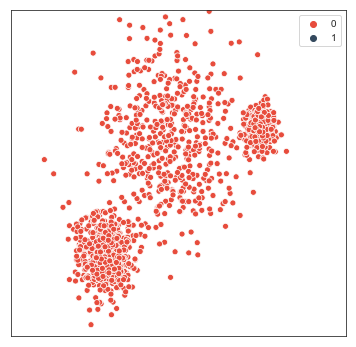

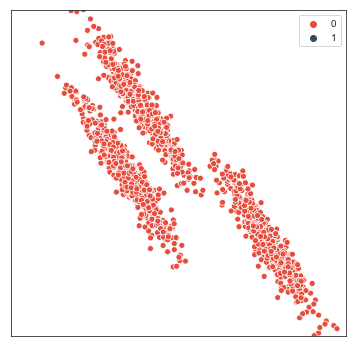

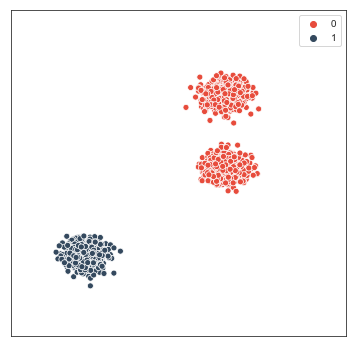

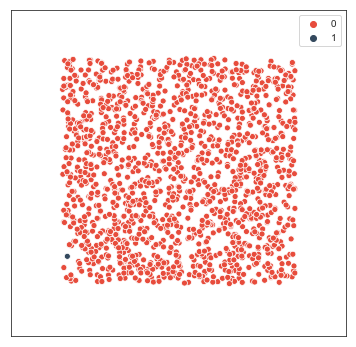

In [10]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

req_clus = 2

for dataset in datasets:

    # Standardize the dataset
    X = StandardScaler().fit_transform(dataset[['X1', 'X2']])

    # Fit a model using Ward's linkage
    ward = cluster.AgglomerativeClustering(n_clusters=req_clus, linkage='single').fit(X)

    # Predict cluster
    y_pred = ward.labels_.astype(np.int)
    
    # Count the number of _predicted_ clusters
    n_pred_clus = len(np.unique(y_pred))

    # Scatter plot, color each data point according to the predicted cluster
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=colors[:n_pred_clus])
    
    # Adjust/clean the plot
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())

**EXERCISE:** Agglomerative Clustering using Complete Linkage Method.

In [ ]:

### INSERT CODE HERE ###


### Comparisons of two linkage methods for Agglomerative Clustering

In [ ]:
plt.figure(figsize=(15, 30))
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

for i, dataset in enumerate(datasets):
           
    X = StandardScaler().fit_transform(dataset[['X1', 'X2']])
    
    for criterion in ['none', 'ward', 'complete']:

        plt.subplot(len(datasets), 3, plot_num)
        
        if criterion == 'none':
                
            n_clus = dataset['y'].nunique()
            if i == 0:
                plt.title(criterion, size=14)
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dataset['y'], palette=colors[:n_clus])

        else:
            agglomerative = cluster.AgglomerativeClustering(n_clusters=req_clus, linkage=criterion).fit(X)
            y_pred = agglomerative.labels_.astype(np.int)
            n_pred_clus = len(np.unique(y_pred))
            if i == 0:
                plt.title(criterion, size=14)
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=colors[:n_pred_clus])
            
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        
        plot_num += 1
    
plt.show()